## Import Libraries & Load Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Load dataset
df = pd.read_csv("cleaned_yt_dataset.csv")
df.head()

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False


In [2]:
#  Handling Missing Values
# Drop rows with any missing values
df.dropna(inplace=True)

# Alternatively, fill missing values with mean method
columns_to_fill = ['views', 'likes','comment_count']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


## Basic Analysis (Views, Likes, Comments)

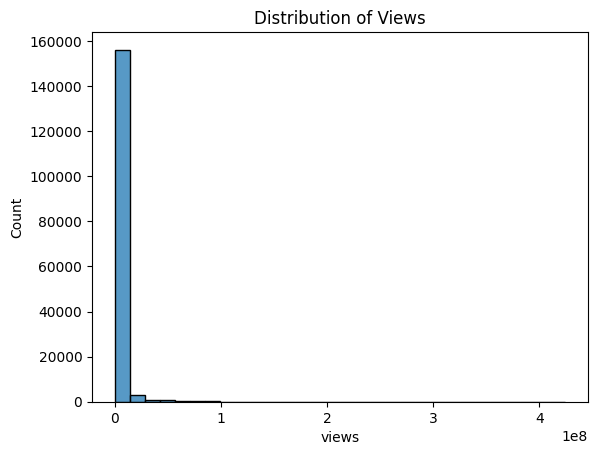

In [3]:
# Compute engagement metrics
df['engagement_rate'] = (df['likes'] + df['comment_count'])/ (df['views'])

# Visualize distribution
sns.histplot(df['views'], bins=30)
plt.title("Distribution of Views")
plt.show()

## Correlation Analysis

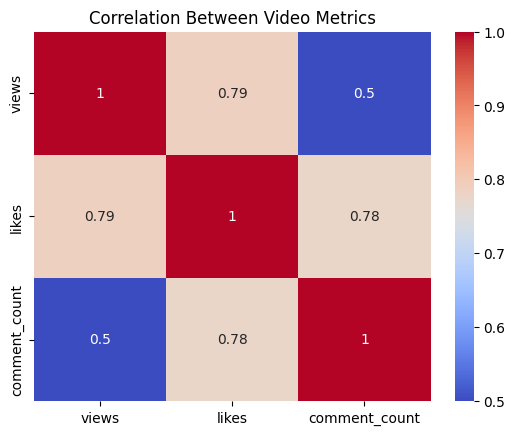

In [4]:
correlation_matrix = df[['views', 'likes', 'comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Video Metrics")
plt.show()

## Time-Series Analysis

C:\Users\KHUSHI COMPUTERS\AppData\Local\Temp\ipykernel_4900\837757832.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_date'] = pd.to_datetime(df['publish_date'])


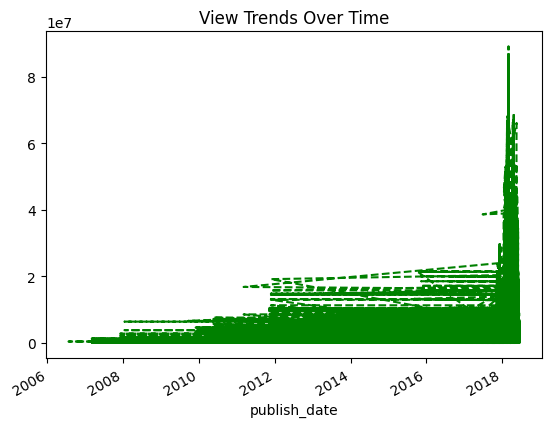

In [5]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df.set_index('publish_date')['views'].rolling(window=7).mean().plot(style='--', color='green')
plt.title("View Trends Over Time")
plt.show()

In [6]:
df['tags'] = df['tags'].apply(lambda x: x.split('|'))
all_tags = df['tags'].explode()
tag_counts = Counter(all_tags)

# Top 10 most-used tags
print(tag_counts.most_common(10))

[('[none]', 11234), ('"funny"', 6528), ('"comedy"', 4968), ('"2018"', 3806), ('""funny""', 3406), ('"music"', 2986), ('""comedy""', 2740), ('"video"', 2722), ('"interview"', 2387), ('"news"', 2310)]


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
from textblob import TextBlob

## Sentiment Analysis (TextBlob & VADER)

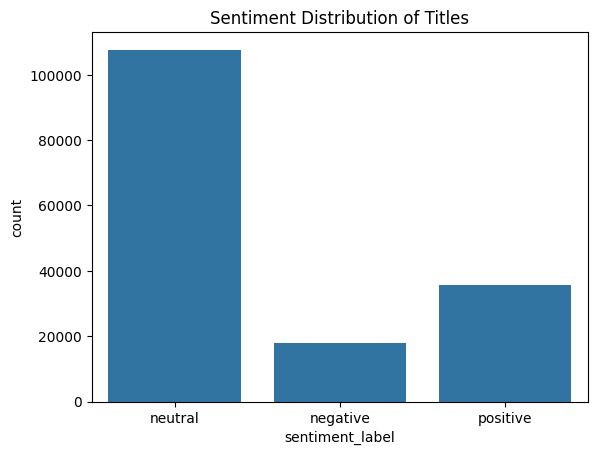

In [11]:
# TextBlob sentiment
df['sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# VADER sentiment
analyzer = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_label'] = df['vader_sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Visualize sentiment distribution
sns.countplot(data=df, x='sentiment_label')
plt.title("Sentiment Distribution of Titles")
plt.show()

<Axes: xlabel='vader_label', ylabel='count'>

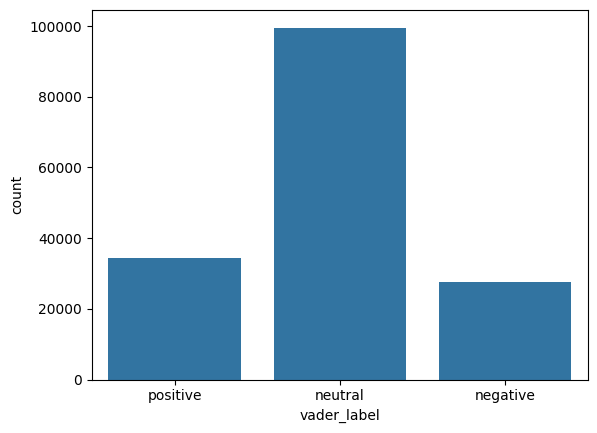

In [12]:
sns.countplot(data=df, x='vader_label')

In [13]:

df.columns

Index(['index', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_date', 'time_frame', 'published_day_of_week',
       'publish_country', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'engagement_rate', 'sentiment',
       'sentiment_label', 'vader_sentiment', 'vader_label'],
      dtype='object')

# Title Sentiment Analysis

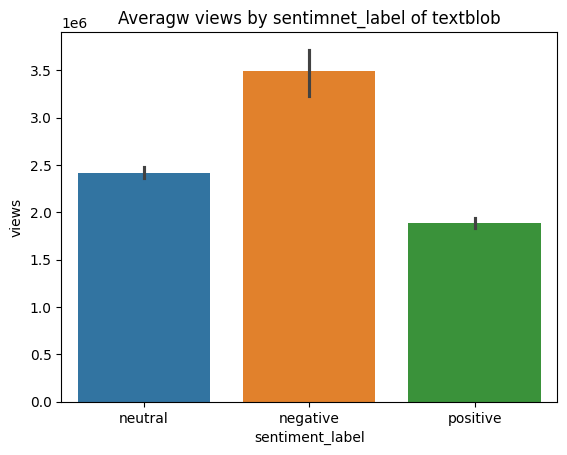

In [14]:
ax = sns.barplot(data=df, x='sentiment_label', y = 'views', hue= 'sentiment_label')
ax.set_title("Averagw views by sentimnet_label of textblob")
plt.show()


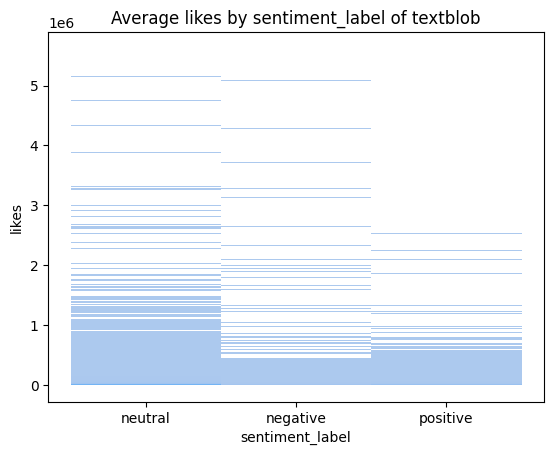

In [15]:
ax = sns.histplot(data=df, x='sentiment_label', y = 'likes')
ax.set_title("Average likes by sentiment_label of textblob")
plt.show()

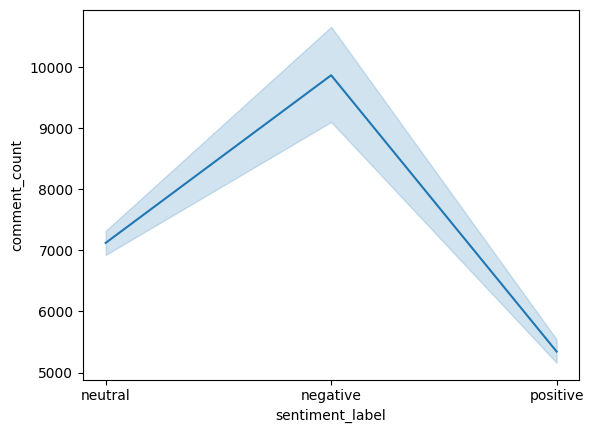

In [16]:
ax = sns.lineplot(data=df, x="sentiment_label", y = 'comment_count')
plt.show()


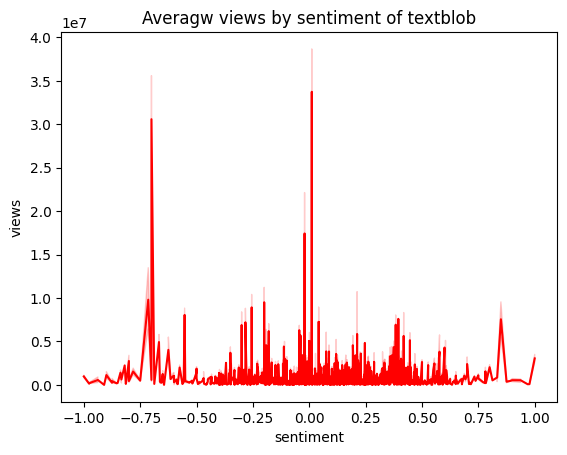

In [17]:
ax = sns.lineplot(data=df, x='sentiment', y = 'views',color = 'red')
ax.set_title("Averagw views by sentiment of textblob")
plt.show()

In [18]:
# Vader title analysis

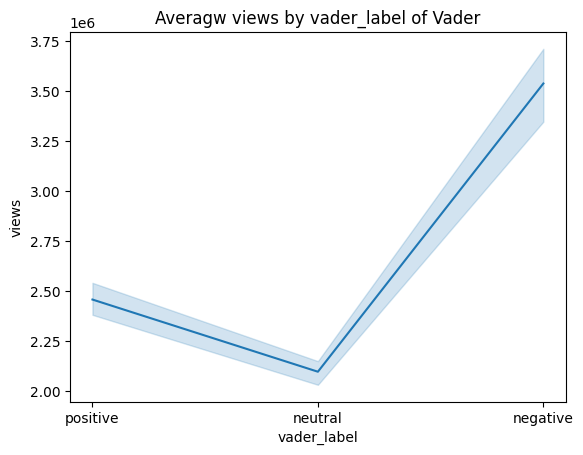

In [19]:
ax = sns.lineplot(data=df, x='vader_label', y = 'views')
ax.set_title("Averagw views by vader_label of Vader")
plt.show()

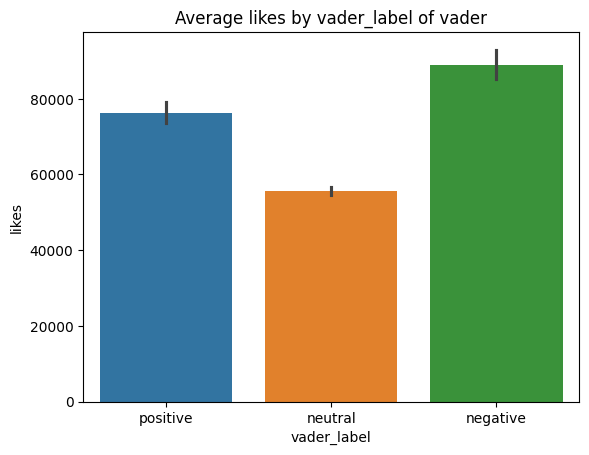

In [20]:
ax = sns.barplot(data=df, x='vader_label', y = 'likes', hue = 'vader_label')
ax.set_title("Average likes by vader_label of vader")
plt.show()

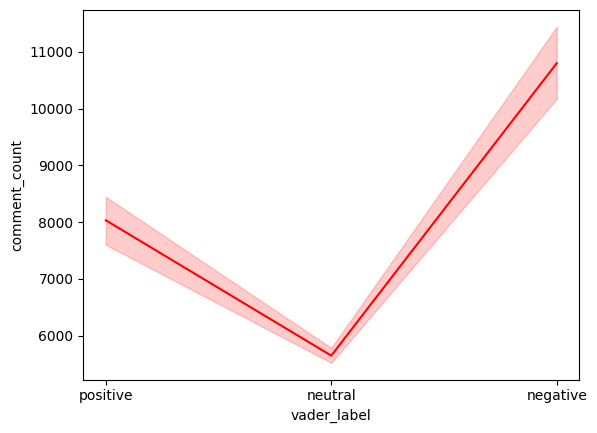

In [21]:
ax = sns.lineplot(data=df, x="vader_label", y = 'comment_count', color = 'red')
plt.show()

# Title sentiment analysis finished !

# Tags Sentiment Analysis


In [22]:
# TextBlob sentiment
df['tags_text'] = df['tags'].apply(lambda x: ' '.join(x) if isinstance(x,list) else x)
df['tags_sentiment'] = df['tags_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tags_sentiment_label'] = df['tags_sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [23]:
# VADER sentiment
analyzer = SentimentIntensityAnalyzer()
df['tags_vader_sentiment'] = df['tags_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['tags_vader_label'] = df['tags_vader_sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')


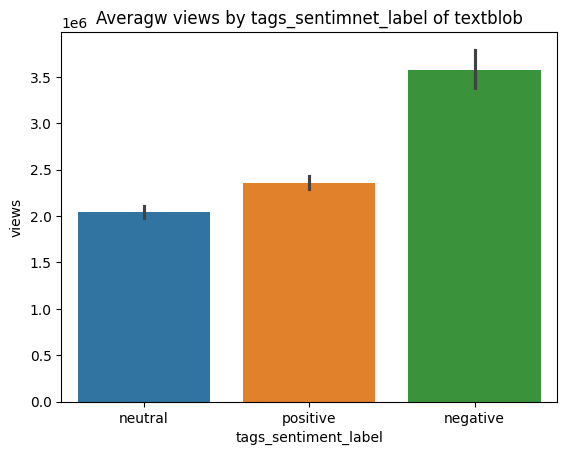

In [24]:
# Textblob sentiment analysis
ax = sns.barplot(data=df, x='tags_sentiment_label', y = 'views', hue= 'tags_sentiment_label')
ax.set_title("Averagw views by tags_sentimnet_label of textblob")
plt.show()

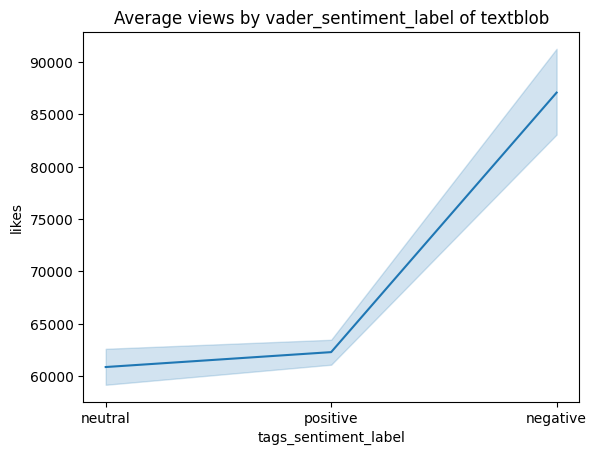

In [25]:
ax = sns.lineplot(data=df, x='tags_sentiment_label', y ='likes')
ax.set_title("Average views by vader_sentiment_label of textblob")
plt.show()

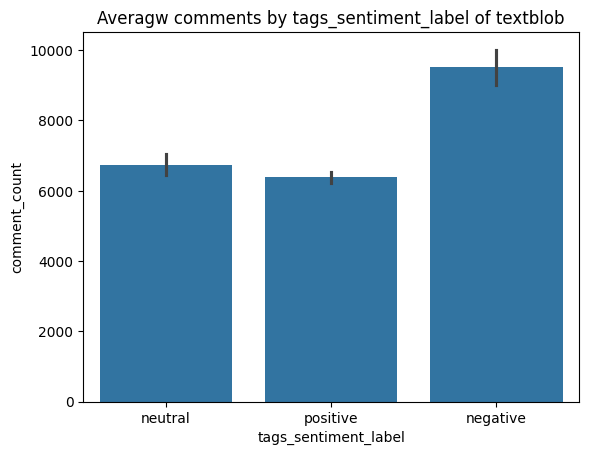

In [26]:
ax = sns.barplot(data=df, x='tags_sentiment_label', y ='comment_count')
ax.set_title("Averagw comments by tags_sentiment_label of textblob")
plt.show()

In [27]:
df.to_csv('processed_yt_dataset.csv')

In [30]:
positive_tags  = df[df['tags_sentiment'] > 0]['tags_text'].value_counts().head(1)
print('Top 10 positive tags:' ,positive_tags)

Top 10 positive tags: tags_text
the real "daytime" "talk show" "women" "tamera mowry" "adrienne bailon" "loni love" "jeannie mai"    155
Name: count, dtype: int64


In [32]:
negative_tags  = df[df['tags_sentiment'] < 0]['tags_text'].value_counts().head(1)
print('Top 10 negative tags:' ,negative_tags)

Top 10 negative tags: tags_text
The Late Show "Stephen Colbert" "Colbert" "Late Show" "celebrities" "late night" "talk show" "skits" "bit" "monologue" "The Late Late Show" "Late Late Show" "letterman" "david letterman" "comedian" "impressions" "CBS" "joke" "jokes" "funny" "funny video" "funny videos" "humor" "celebrity" "celeb" "hollywood" "famous" "James Corden" "Corden" "Comedy"    146
Name: count, dtype: int64
